[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


['DOGE-USD', 'SAND-USD', 'TRX-USD', 'RUNE-USD']


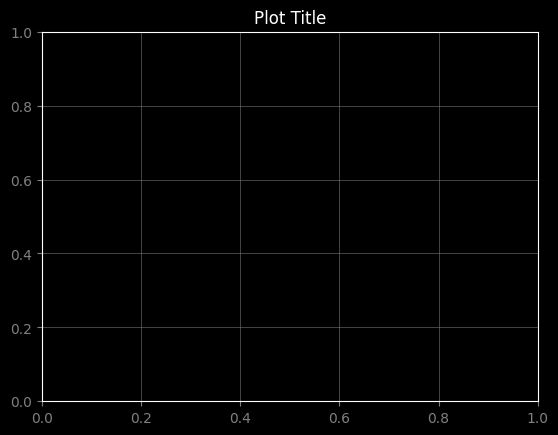

In [1]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import datetime as dt
from tensorflow.keras.models import *
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import ta
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD
from keras.regularizers import l2
from sklearn.multioutput import MultiOutputRegressor
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


# Set dark mode style
plt.style.use('dark_background')

# Customize gridlines, axes, and title colors
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.75)
plt.gca().xaxis.label.set_color('grey')
plt.gca().yaxis.label.set_color('grey')
plt.gca().tick_params(colors='grey')
plt.title('Plot Title', color='white')

# List of cryptocurrencies
stock_list = ['DOGE-USD', 'SAND-USD', 'TRX-USD', 'RUNE-USD']

# Full names (optional) - Not used for downloading data
company_name = ["DOGE", "SANDBOX", "TRON", "THOR"]  # Added full names for reference

# Setting up start and end dates
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# Download and store data in separate variables
downloaded_data = {}  # Dictionary to hold downloaded data
for stock in stock_list:
    downloaded_data[stock] = yf.download(stock, start, end)

# Still available (optional)
print(stock_list)  # List of cryptocurrencies remains unchanged

In [2]:
# Concatenation of lists to get one DataFrame with all stocks
company_list = stock_list

for stock, com_name in zip(company_list, company_name):
    downloaded_data[stock]["company_name"] = com_name

df = pd.concat(downloaded_data.values(), ignore_index=True)

In [3]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
120,0.089281,0.091262,0.084966,0.085044,0.085044,849757697,DOGE
2909,5.071261,5.337021,4.520507,4.581154,4.581154,251345223,THOR
488,0.085169,0.090536,0.085121,0.089477,0.089477,663450017,DOGE
910,0.689544,0.701248,0.680309,0.684930,0.684930,133955729,SANDBOX
1140,0.408676,0.417891,0.404603,0.415088,0.415088,68038147,SANDBOX
586,0.166220,0.173036,0.164365,0.169090,0.169090,1404874711,DOGE
717,0.109264,0.110063,0.107727,0.109487,0.109487,391880787,DOGE
2301,1.770141,1.837481,1.690304,1.832238,1.832238,58682849,THOR
360,0.058400,0.059930,0.058400,0.059859,0.059859,112567930,DOGE
146,0.073036,0.077640,0.071777,0.074787,0.074787,652033915,DOGE


In [4]:
# Data summary
sk.skim(df)
# sns.pairplot(df, hue='company_name', diag_kind='kde', palette='inferno')

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2928   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open     │  0 │    0 │    0.984 │    1.715 │  0.05003 │  0.08552 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ High     │  0 │    0 │    1.021 │    1.792 │  0.05037 │  0.08823 │   0.2349 │   0.8873 │    11.45 │  ▇ ▁   │  │
│ │ Low      │  0 │    0 │   0.9476 │     1.64 │   0.0458 │  0.08381 │   0.2093 │    0.826 │    10.39 │  ▇ ▁   │  │
│ │ Close    │  0 │    0 │   0.9851 │    1.717 │  0.05004 │  0.08557 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ Adj      │  0 │    0 │   0.9851 │    1.717 │  0.05004 │  0.08557 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ Close    │    │      │          │          │          │          │          │          │          │        │  │
│ │ Volume   │  0 │    0 │ 24930000 │ 38510000 │ -2141000 │ 76970000 │ 19210000 │ 33870000 │ 21360000 │    ▇▁  │  │
│ │          │    │      │        0 │        0 │      000 │          │        0 │        0 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ company_name               │      0 │          0 │                            1 │                     2928 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# [X] What was the change in price over time?

#### What is the Differnce between Adjusted Closing Price & Closing Price?
- Closing Price: The final price a stock trades at during a trading day.
- Adjusted Closing Price: The closing price adjusted for corporate actions (splits, dividends, rights offerings) to provide a more accurate representation of the stock's value.

#### Why is the adjusted closing price important?
- Accurate historical comparisons: When analyzing a stock's performance over time, the adjusted closing price provides a more accurate picture by accounting for corporate actions that could have artificially inflated or deflated the price.   
Fair valuation: It helps investors compare the value of a stock with other stocks, even if they have undergone different corporate actions.


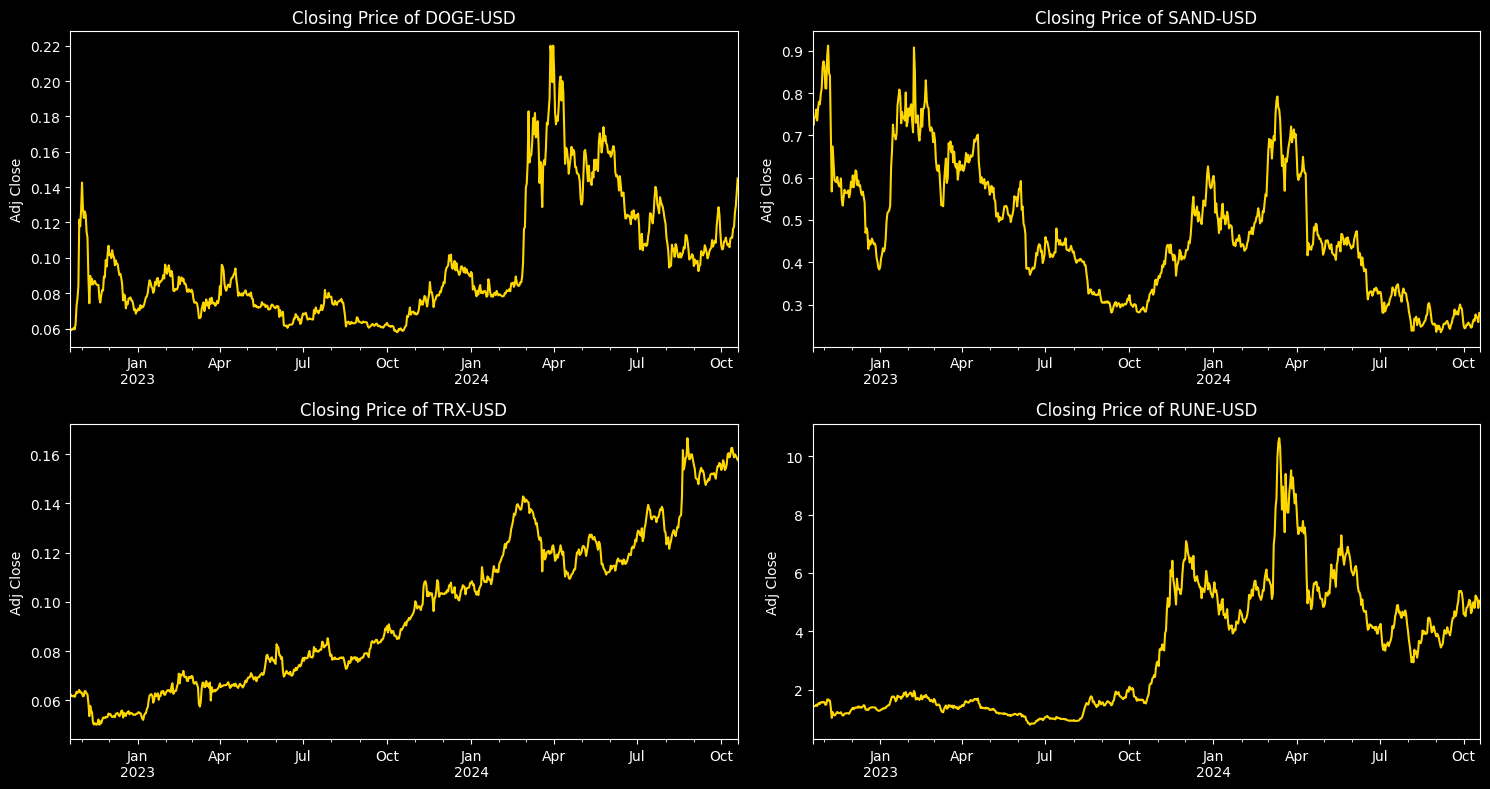

In [5]:
# Now ploting the closing price of all selected stocks

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    downloaded_data[company]['Adj Close'].plot(color='gold')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()

#### What is Trading Volume?

- Trading volume is a measure of the number of shares traded during a specific time period. It provides insight into the level of market activity and investor interest in a particular security.
- For example, if a stock has a high trading volume, it indicates that many investors are actively buying and selling the stock.

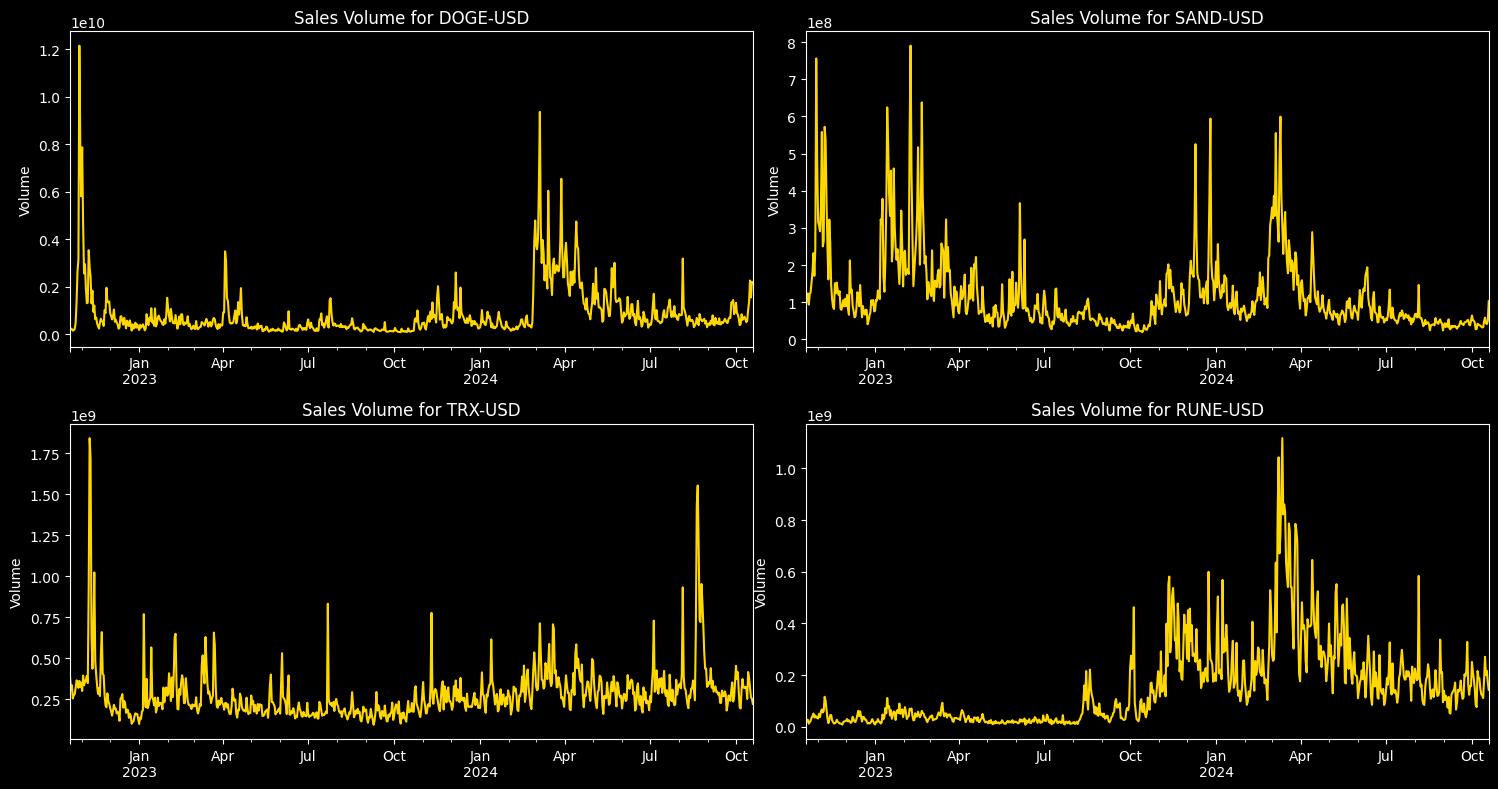

In [6]:
# Lets see total volume of selected stock being traded daily

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    downloaded_data[company]['Volume'].plot(color='gold')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company}")

plt.tight_layout()

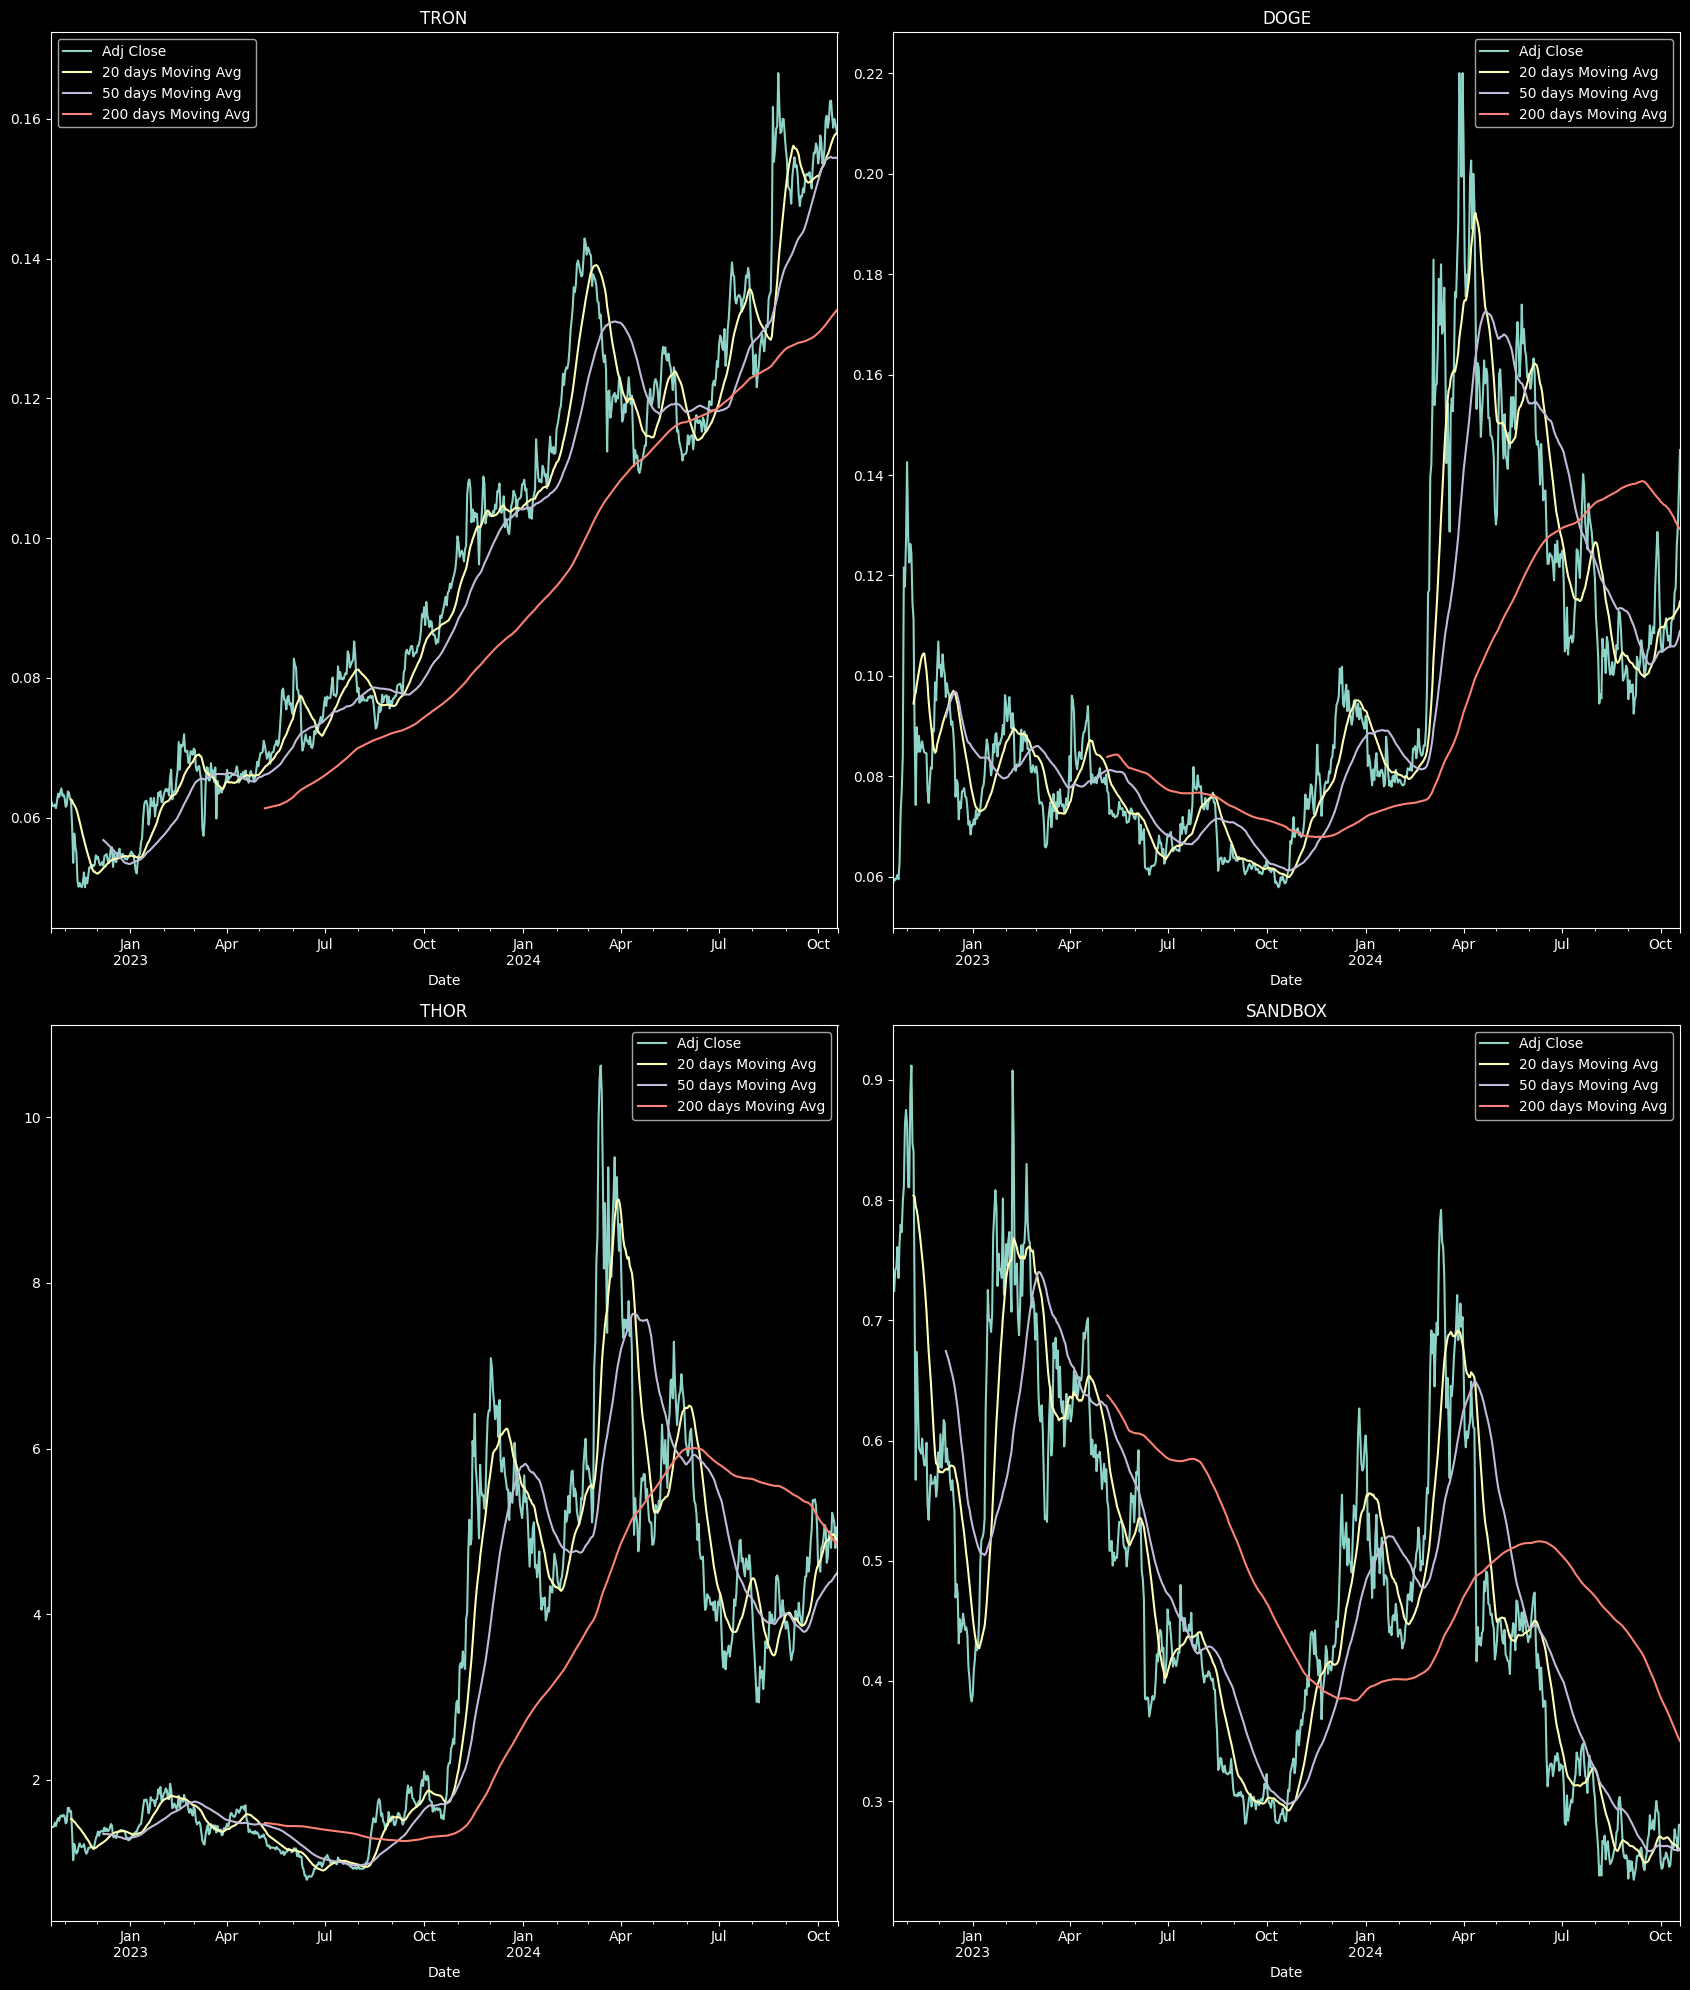

In [7]:
# Analysing Trends and Crossovers
#=====================================

ma_day = [20, 50, 200]  # Moving Average periods

for ma in ma_day:
    for company in company_list:
        column_name = f"{ma} days Moving Avg"  # col names by days
        downloaded_data[company][column_name] = downloaded_data[company]['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(17)

# Replace with your cryptocurrency tickers
downloaded_data['TRX-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0, 0], linestyle='-')
axes[0, 0].set_title('TRON')  # Replace with the appropriate cryptocurrency name

downloaded_data['DOGE-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0, 1], linestyle='-')
axes[0, 1].set_title('DOGE')  # Replace with the appropriate cryptocurrency name

downloaded_data['RUNE-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1, 0], linestyle='-')
axes[1, 0].set_title('THOR')  # Replace with the appropriate cryptocurrency name

downloaded_data['SAND-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1, 1], linestyle='-')
axes[1, 1].set_title('SANDBOX')  # Replace with the appropriate cryptocurrency name

fig.tight_layout()

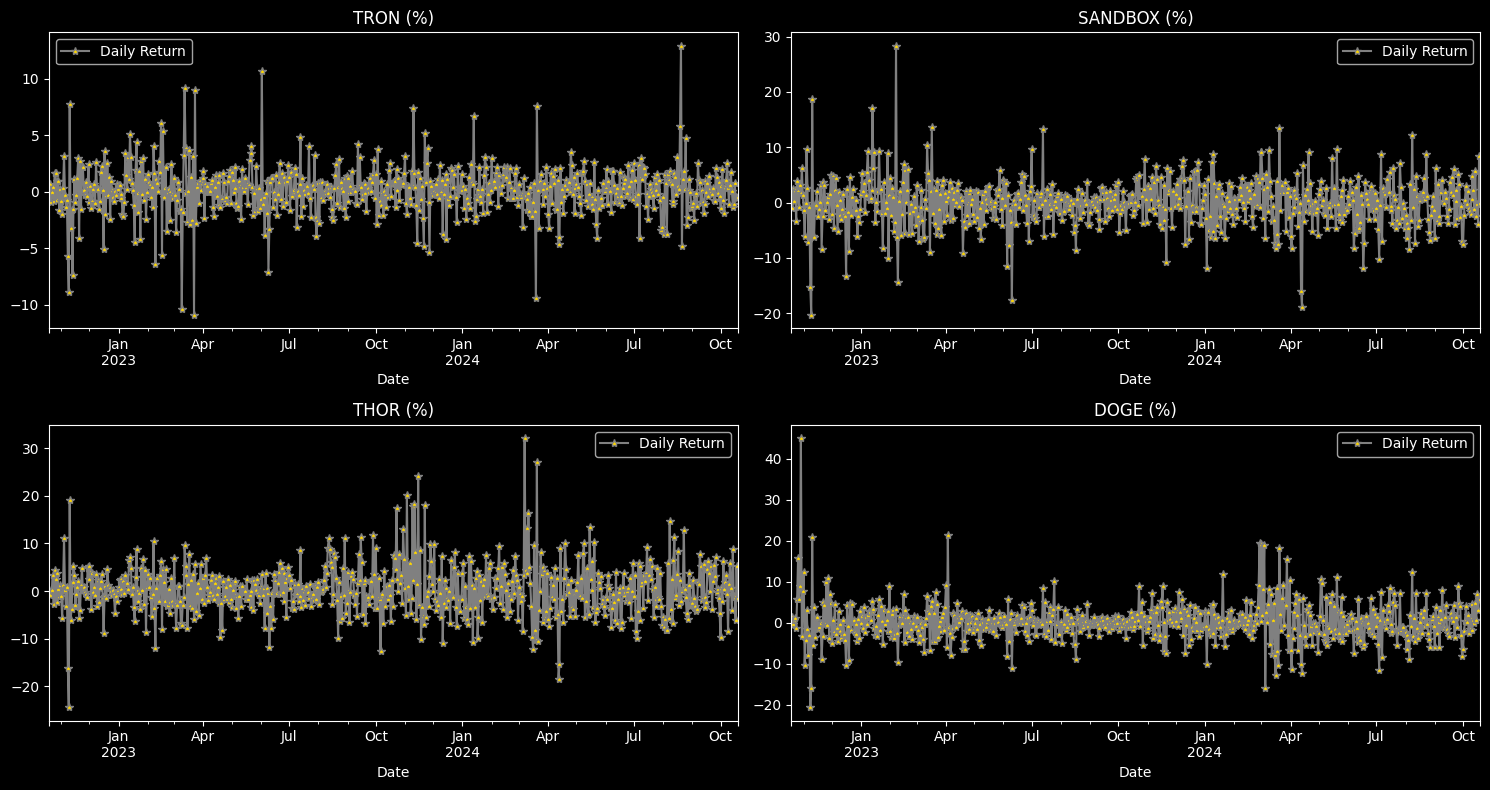

In [8]:
# Apply pct_change to find the change pct for each day
# Calculate Daily Returns
for company in company_list:
    downloaded_data[company]['Daily Return'] = downloaded_data[company]['Adj Close'].pct_change() * 100  # Multiply by 100 for percentage return

# Plotting Daily Returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Replace with your cryptocurrency tickers
downloaded_data['TRX-USD']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 0].set_title('TRON (%)')

downloaded_data['SAND-USD']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 1].set_title('SANDBOX (%)')

downloaded_data['RUNE-USD']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 0].set_title('THOR (%)')

downloaded_data['DOGE-USD']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 1].set_title('DOGE (%)')

fig.tight_layout()
plt.show()

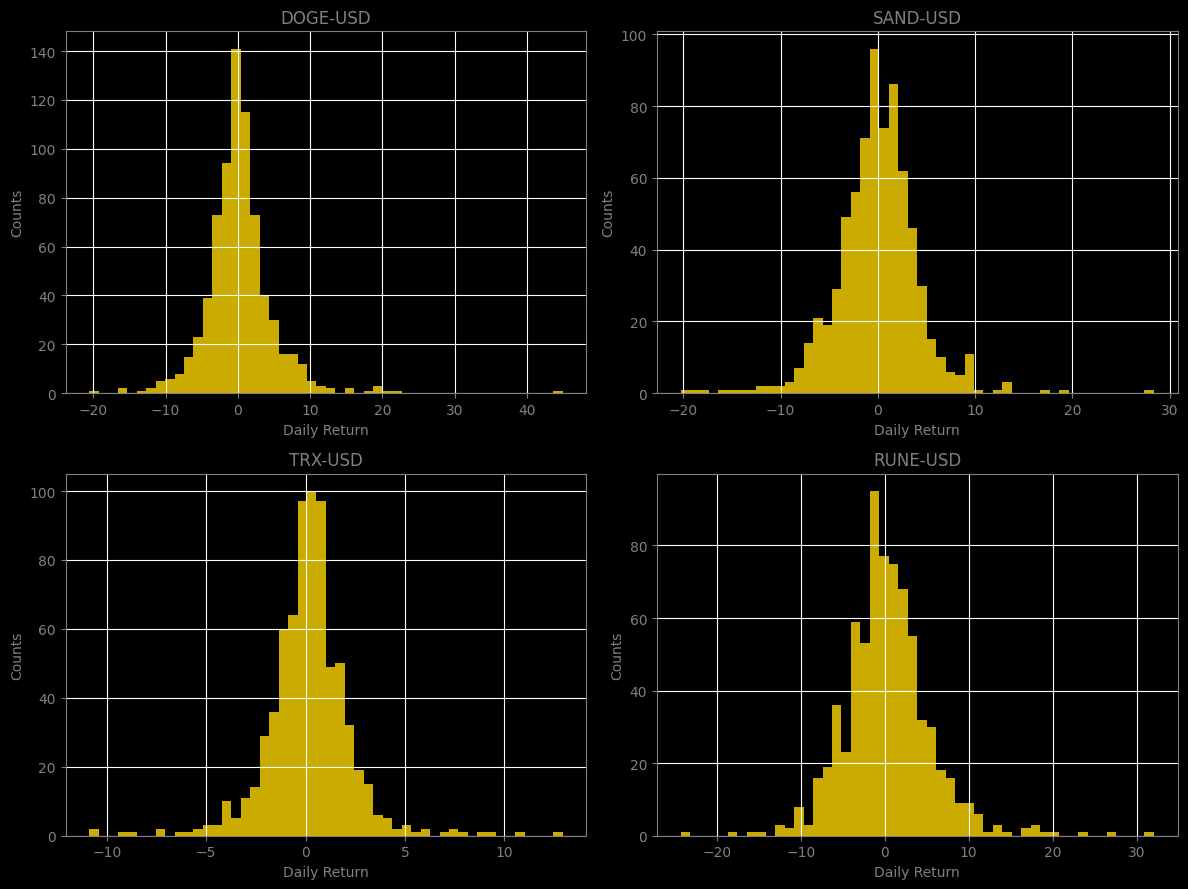

In [9]:
# Set the figure size and background color
plt.figure(figsize=(12, 9), facecolor='black')

# Customize the subplot parameters for a darker theme
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'gray'

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    downloaded_data[company]['Daily Return'].hist(bins=50, alpha=0.8, histtype='stepfilled', color='gold', cumulative=False)

    plt.xlabel('Daily Return', color='gray')
    plt.ylabel('Counts', color='gray')
    plt.title(f'{company}', color='gray')  # Use company directly

plt.tight_layout()

In [10]:
# Download stock data
data = yf.download(stock_list, start, end)

# Extract adjusted closing prices
closing_prices = data['Adj Close']

# Calculate daily returns pct
Stock_returns = closing_prices.pct_change()

Stock_returns.head()


[*********************100%***********************]  4 of 4 completed


Ticker,DOGE-USD,RUNE-USD,SAND-USD,TRX-USD
Date,,,,
2022-10-19 00:00:00+00:00,NaN,NaN,NaN,NaN
2022-10-20 00:00:00+00:00,0.014017,-0.007966,-0.010629,0.006960
2022-10-21 00:00:00+00:00,-0.003393,0.001511,0.024218,-0.008857
2022-10-22 00:00:00+00:00,0.006067,0.002912,0.002563,-0.000357
2022-10-23 00:00:00+00:00,0.010939,0.033320,0.023316,0.003894


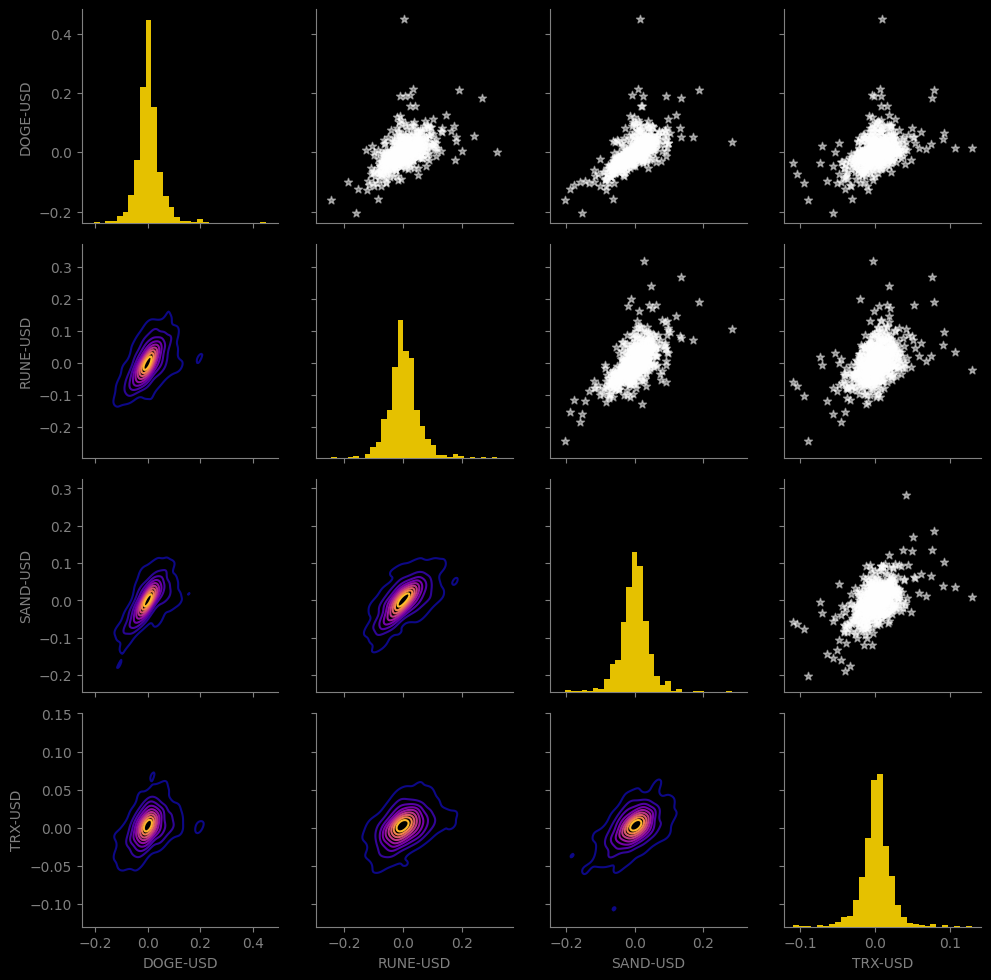

In [11]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


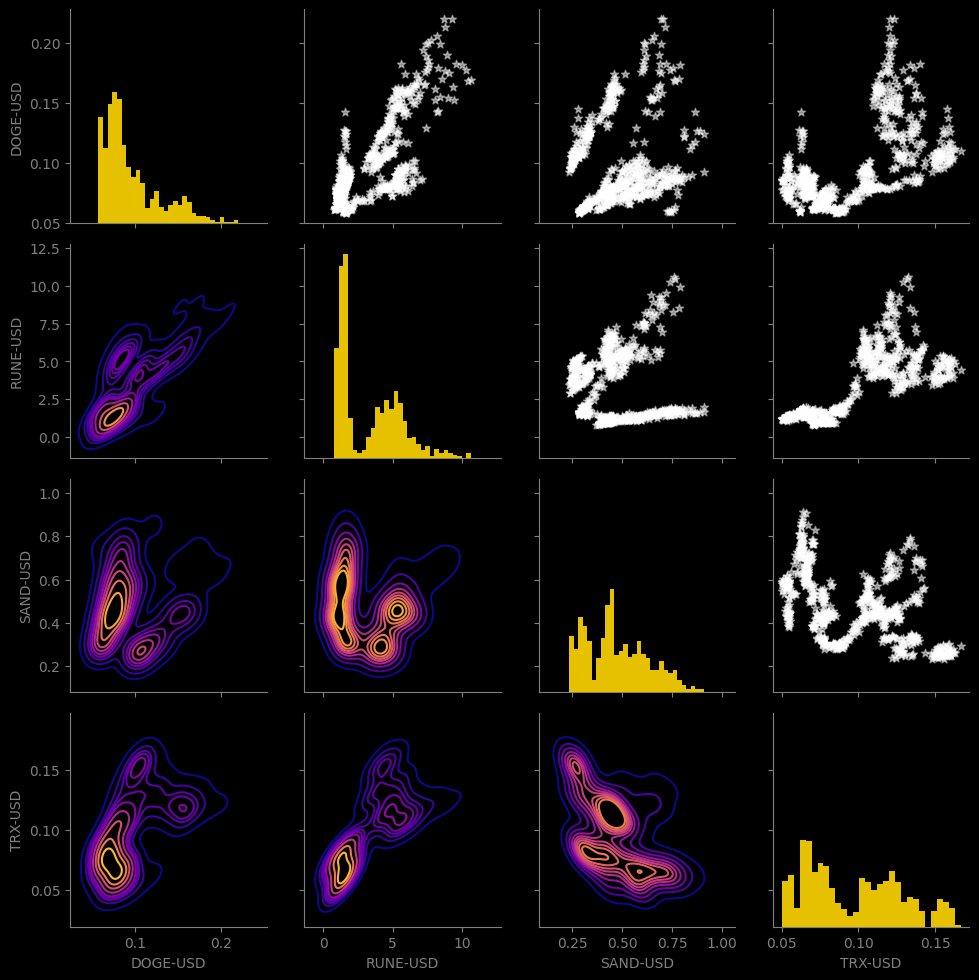

In [12]:
# Lets see how it looks when we view actual daily returns directly by [closing_price] from downloaded table
# ====================== 
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_prices.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


Text(0.5, 1.0, 'Correlation of stock closing price')

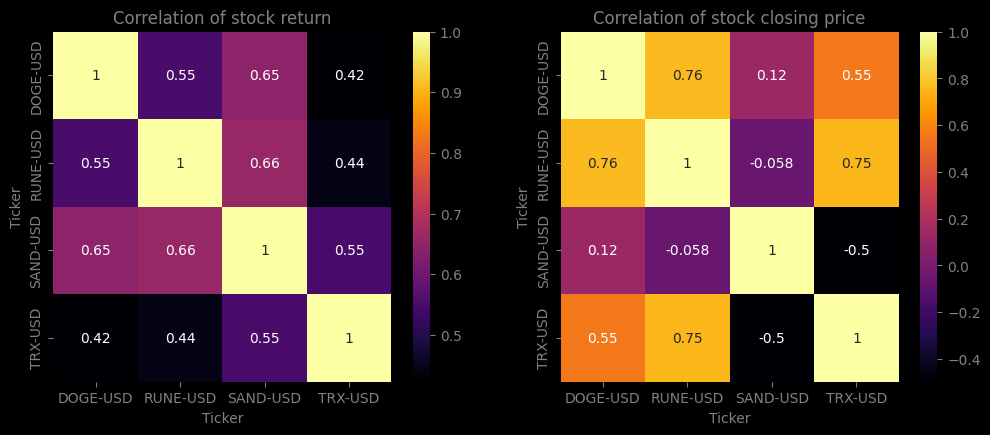

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(Stock_returns.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock closing price')

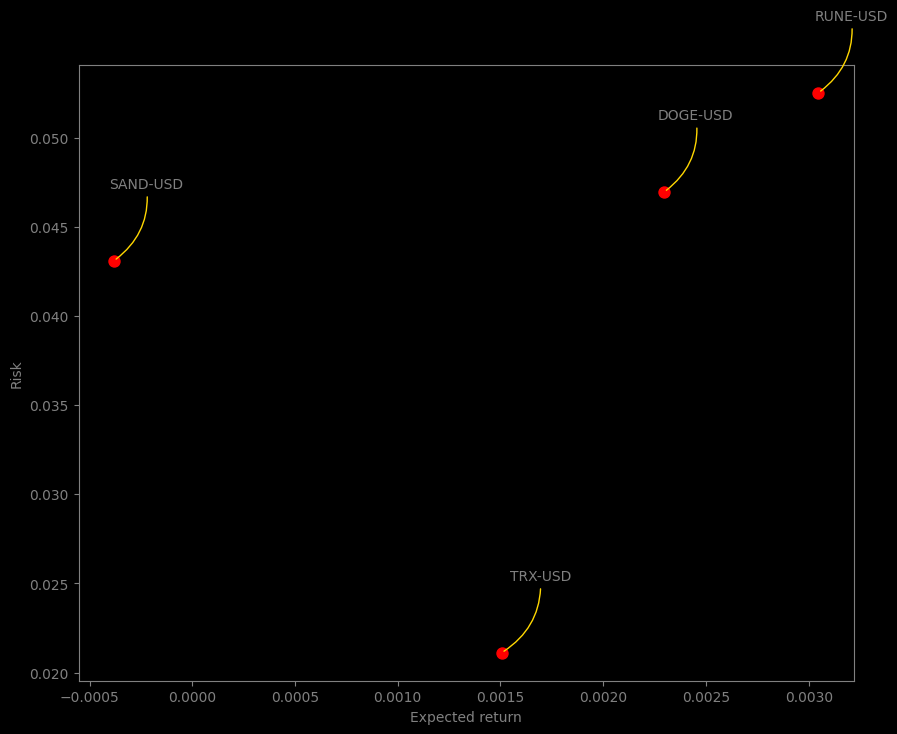

In [14]:
rets = Stock_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, color='red')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='gold', connectionstyle='arc3,rad=-.3'))

In [15]:
# Get the stock between periods 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, max
#ticker = "TRX-USD"
#df = yf.download(ticker, period="10y")

#backtesting download
ticker = "TRX-USD"
start = "2000-01-01"  # Start date for the data (10 years ago from today)
end = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")  # End date for the data (excluding the last 5 days)

data = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


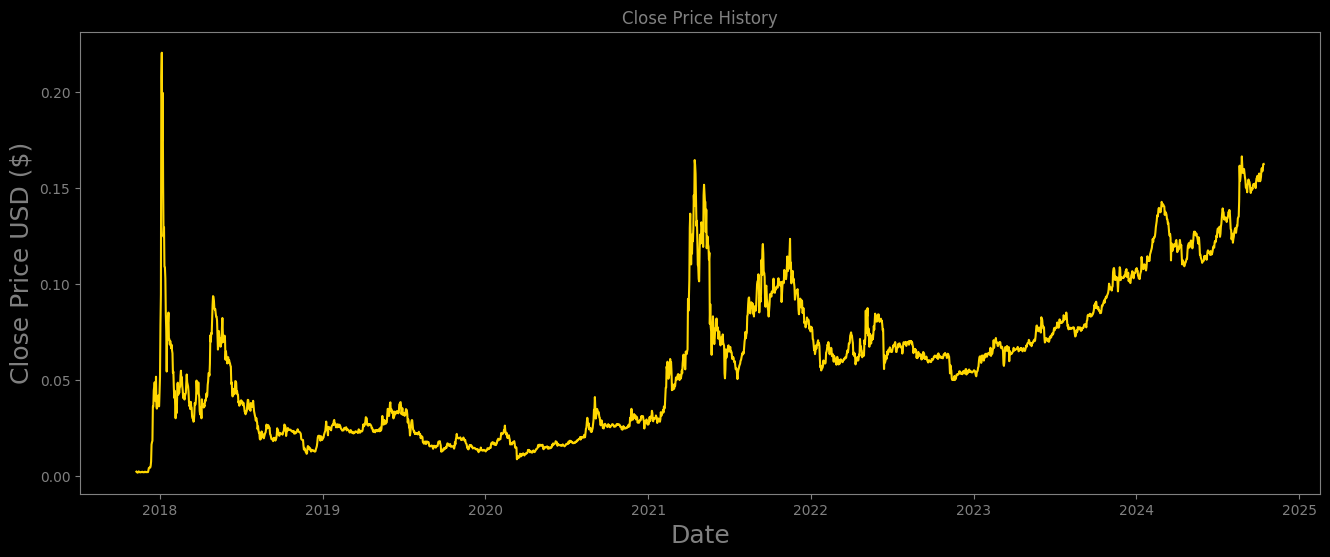

In [16]:
# Create a new dataframe with only the 'Close column 
df = data.filter(['Close'])

# Remove NA
df = df.dropna()
df = df.replace('', np.nan).dropna()
df = df[~df.isnull().any(axis=1)]

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], color='gold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

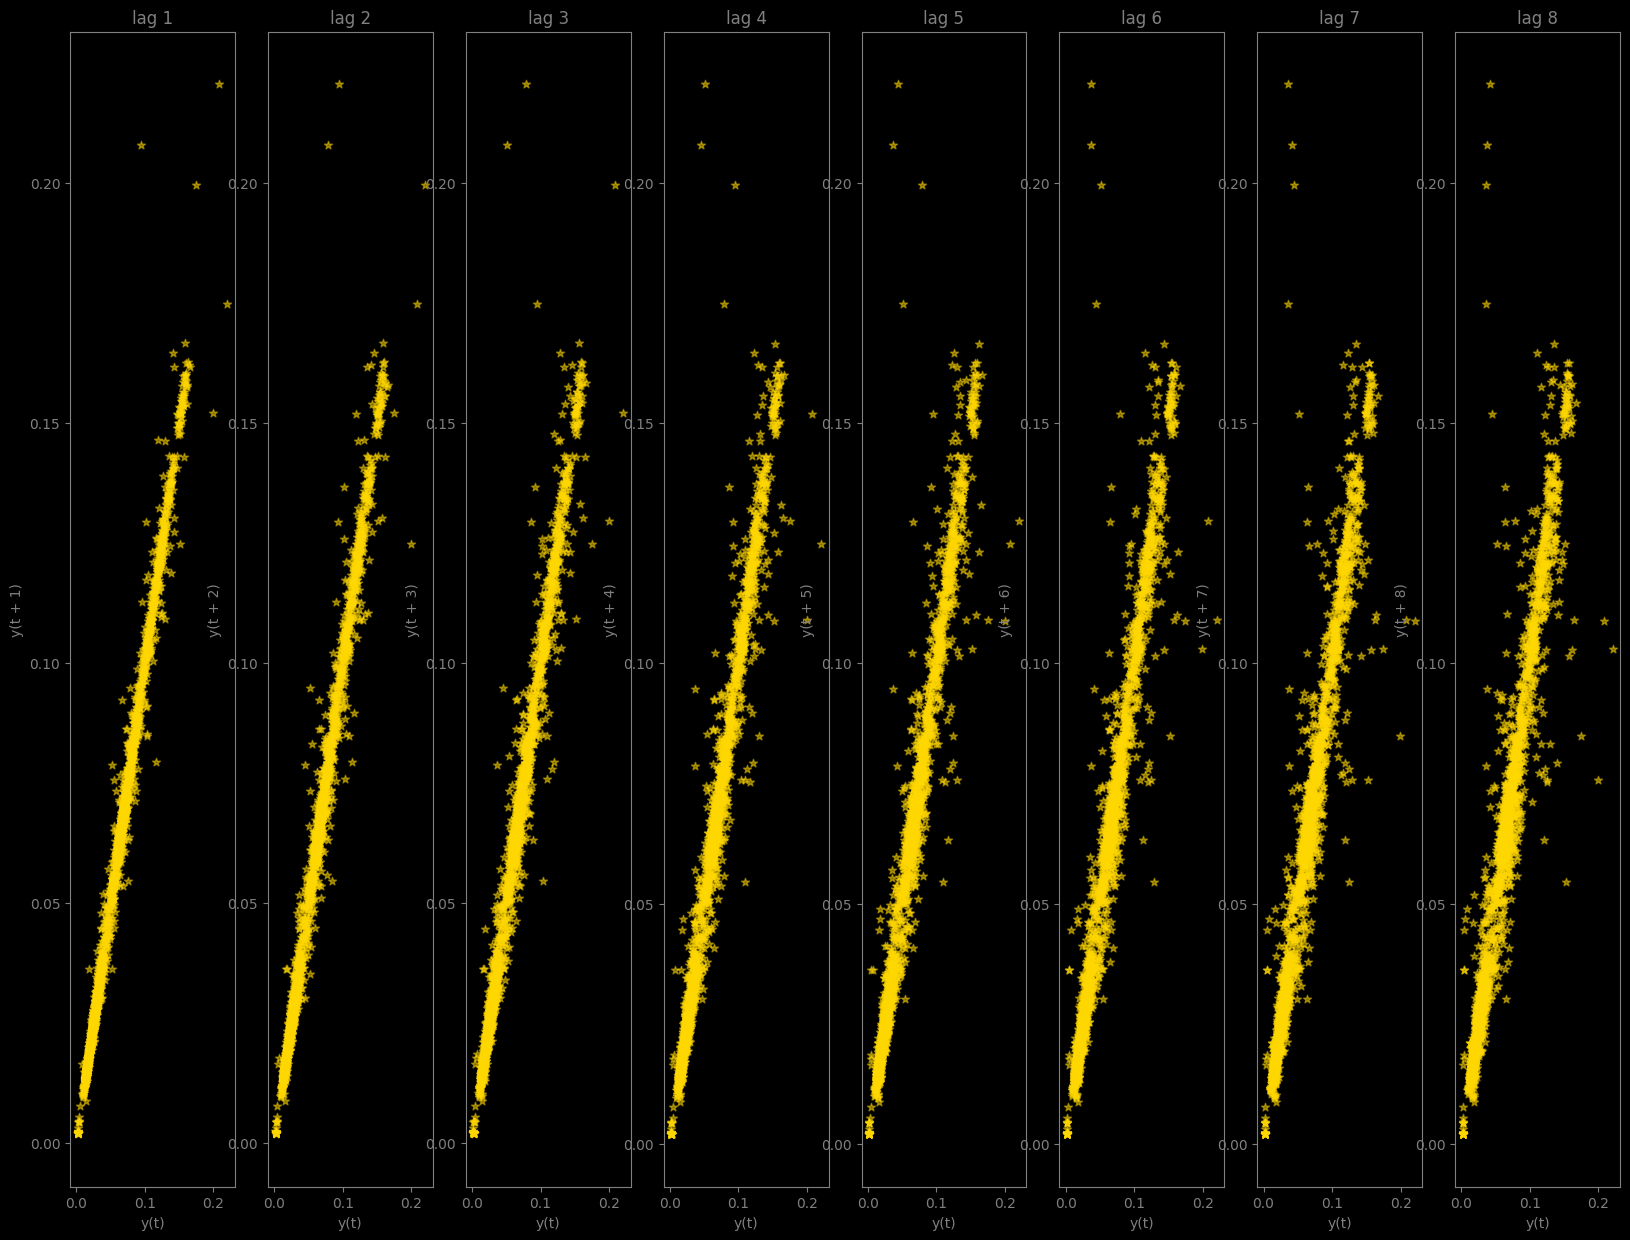

In [17]:
# setting up time lag plots

fig, axs = plt.subplots(ncols=8, figsize=(20,15)) # setting 9
for ax, i in zip(axs.flat, range(1,9)): # setting 10
    pd.plotting.lag_plot(df, lag=i, ax=ax, alpha=0.5, c='gold', marker='*')
    ax.set_title('lag '+ str(i) )

plt.show()

Text(0.5, 0, 'lags')

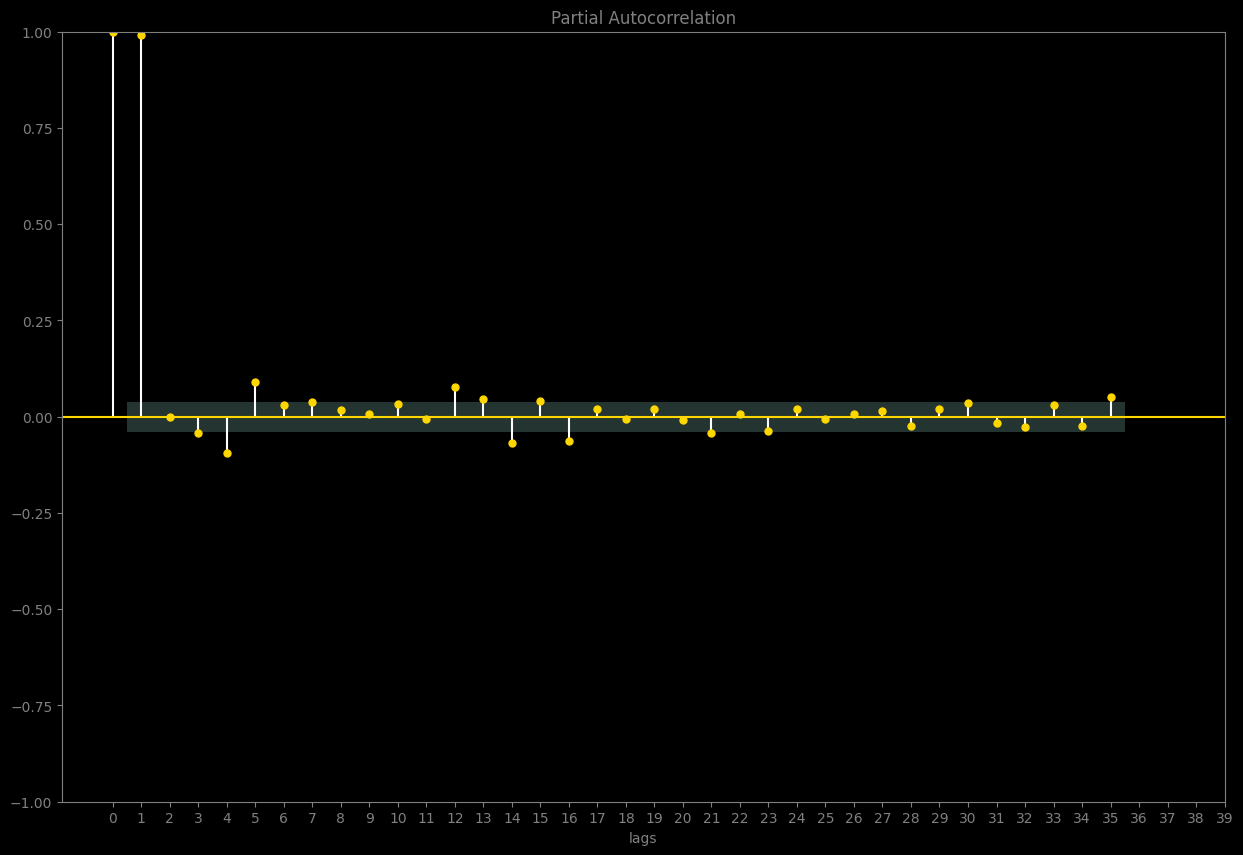

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
_, ax = plt.subplots(figsize=(15, 10))
plot_pacf(df.dropna(), ax=ax, method='ywm', color='gold')
ind = [i for i in range(40)]
ax.set_xticks(ind)
ax.set_xlabel('lags')

* The PACF is a statistical tool used to analyze the presence of significant autocorrelations at different lags in a time series. By plotting the PACF, you can identify lags where past values have a statistically significant correlation with the current value. This information is valuable for tasks like model selection in time series forecasting. It helps you determine the appropriate number of lags to include when building a model to capture the relationship between past and future values in the data.

In [19]:
X = df.copy()
X['lag0'] = X['Close'].shift(0)
X['lag1'] = X['Close'].shift(1)
X['lag3'] = X['Close'].shift(3)
X['lag4'] = X['Close'].shift(4)
X['lag5'] = X['Close'].shift(5)
X['lag10'] = X['Close'].shift(10)
X['lag12'] = X['Close'].shift(12)
X['lag13'] = X['Close'].shift(13)
X['lag14'] = X['Close'].shift(14)
X['lag15'] = X['Close'].shift(15)
X['lag16'] = X['Close'].shift(16)
X['lag21'] = X['Close'].shift(21)
X['lag23'] = X['Close'].shift(23)
X['lag135'] = X['Close'].shift(35)
X

,Close,lag0,lag1,lag3,lag4,lag5,lag10,lag12,lag13,lag14,lag15,lag16,lag21,lag23,lag135
Date,,,,,,,,,,,,,,,
2017-11-09,0.002344,0.002344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,0.002013,0.002013,0.002344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-11,0.002003,0.002003,0.002013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,0.001783,0.001783,0.002003,0.002344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,0.002112,0.002112,0.001783,0.002013,0.002344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-09,0.160453,0.160453,0.159866,0.154274,0.153602,0.156511,0.156474,0.155170,0.153201,0.150043,0.151266,0.152363,0.149495,0.148869,0.149984
2024-10-10,0.158728,0.158728,0.160453,0.155853,0.154274,0.153602,0.155915,0.155068,0.155170,0.153201,0.150043,0.151266,0.151535,0.150058,0.149804
2024-10-11,0.159740,0.159740,0.158728,0.159866,0.155853,0.154274,0.153614,0.156474,0.155068,0.155170,0.153201,0.150043,0.152094,0.149495,0.147860


## Using Linear Regression Model for Price prediction

In [20]:
# Cleaning the data
X = X.fillna(method='ffill')
X = X.drop(['Close'], axis=1)
X = X.fillna(0)
X = X.sort_index()
X

,lag0,lag1,lag3,lag4,lag5,lag10,lag12,lag13,lag14,lag15,lag16,lag21,lag23,lag135
Date,,,,,,,,,,,,,,
2017-11-09,0.002344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-10,0.002013,0.002344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-11,0.002003,0.002013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-12,0.001783,0.002003,0.002344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-13,0.002112,0.001783,0.002013,0.002344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-09,0.160453,0.159866,0.154274,0.153602,0.156511,0.156474,0.155170,0.153201,0.150043,0.151266,0.152363,0.149495,0.148869,0.149984
2024-10-10,0.158728,0.160453,0.155853,0.154274,0.153602,0.155915,0.155068,0.155170,0.153201,0.150043,0.151266,0.151535,0.150058,0.149804
2024-10-11,0.159740,0.158728,0.159866,0.155853,0.154274,0.153614,0.156474,0.155068,0.155170,0.153201,0.150043,0.152094,0.149495,0.147860


In [21]:
y = df['Close'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

X_train = X_train.sort_index()
y_train = y_train.sort_index()

# Define the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Define the parameter grid for Grid Search
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [-1, 1, 2, 4, 8],
              'positive': [True, False],
              }

# Perform Grid Search on the training data
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=15)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 2, 4, 8],
                         'positive': [True, False]})

In [23]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
Best score:  1.0


In [24]:
model = grid_search.best_estimator_
y_fore = model.predict(X_test)
y_pred = model.predict(X_train)

y_pred = pd.Series(y_pred, index=y_train.index)
y_fore = pd.Series(y_fore, index=y_test.index)

y_pred = y_pred.sort_index()
y_fore = y_fore.sort_index()

Text(0.5, 1.0, 'Actual and Prediction')

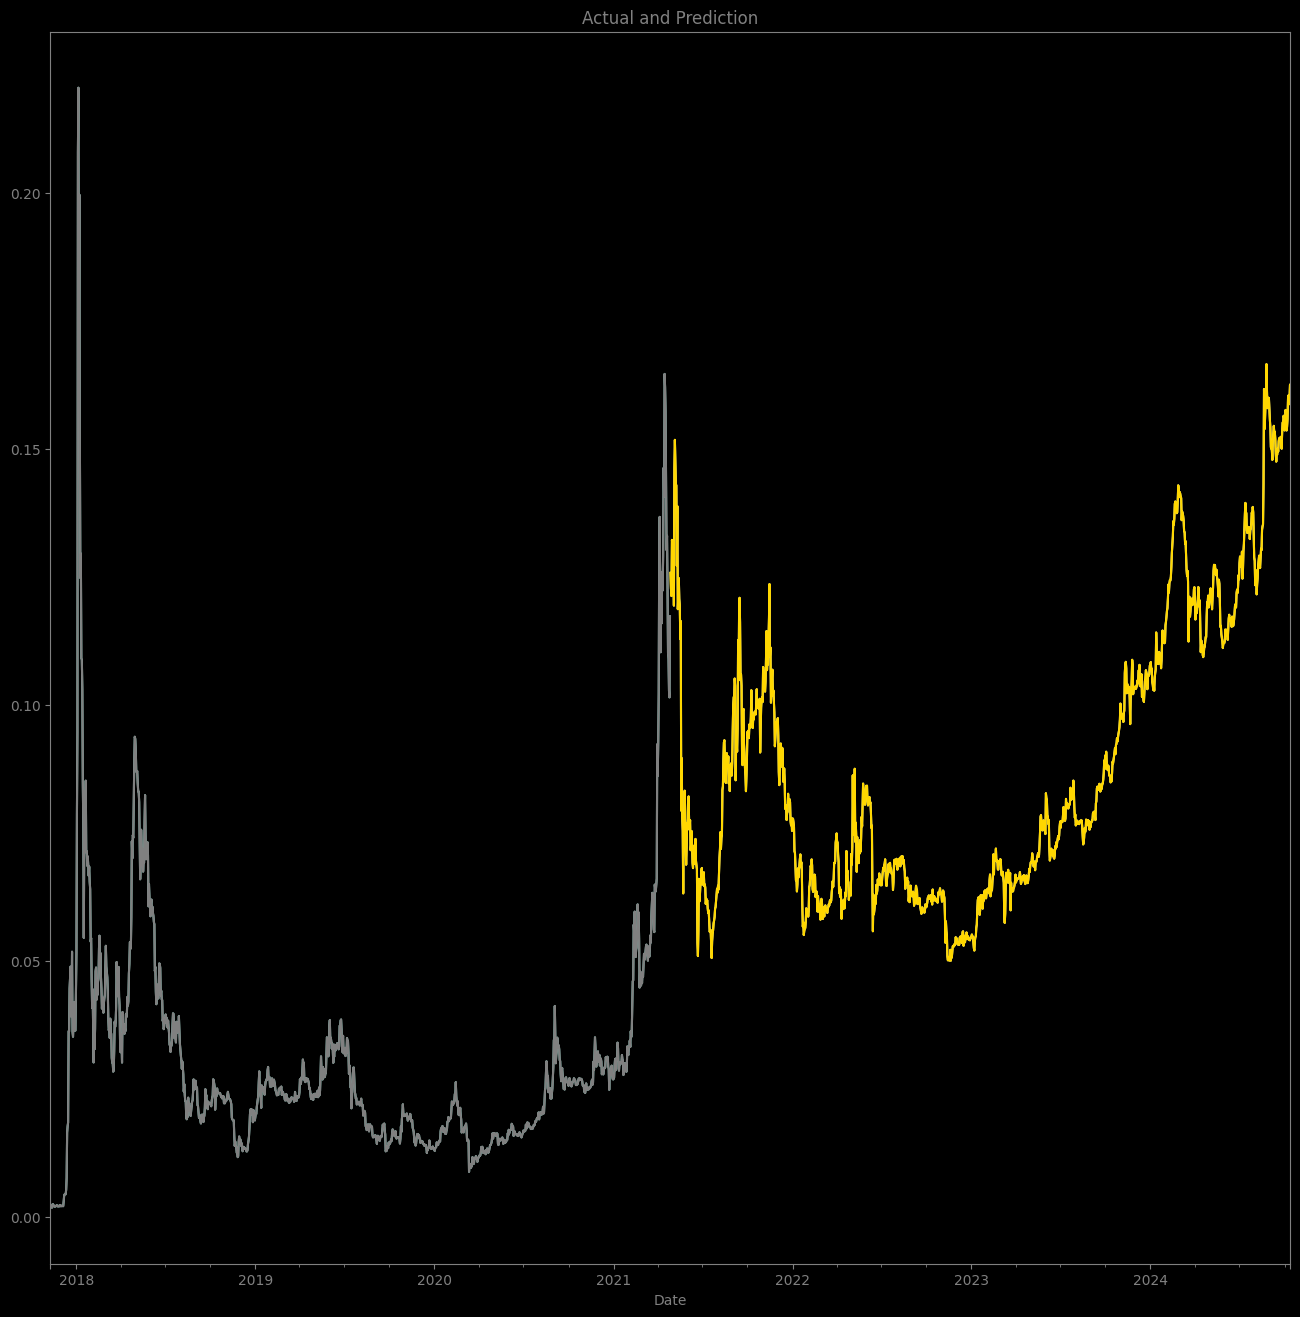

In [25]:
# Plot Actual V/s Prediction
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax, color='GREY', figsize=(16,16)) #p training set
_ = y_fore.plot(ax=ax, color='gold', figsize=(16,16)) #p test set 
ax.set_title('Actual and Prediction')

Text(0.5, 1.0, 'Test over Prediction')

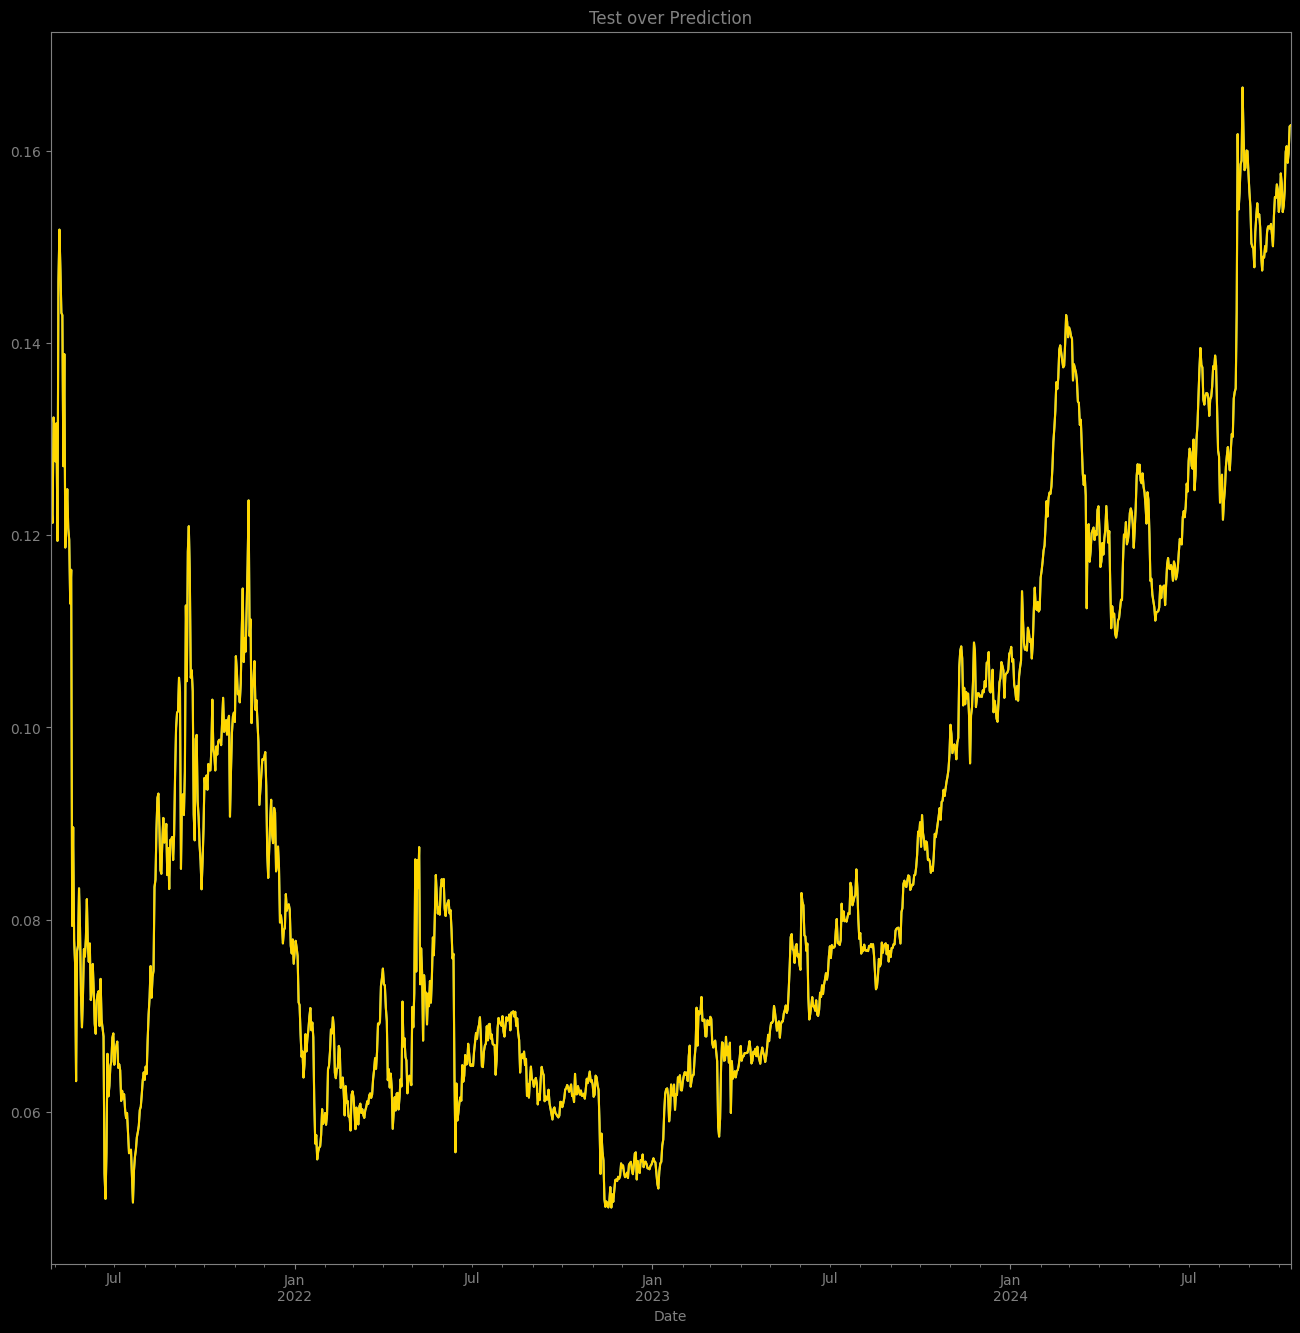

In [26]:
# Plot test vs prediction side by side
ax = y_test.plot()
_ = y_fore.plot(ax=ax, color='gold', figsize=(16, 16))
ax.set_title('Test over Prediction')

### Score

In [27]:
lr_mse = mean_squared_error(y_train, y_pred)
lr_r2 = r2_score(y_test, y_fore)
score_linear = model.score(X_train, y_train)  # Only call this once

print(lr_mse)
print(lr_r2)
print(score_linear)

1.7425197445531176e-34
1.0
1.0


# [X] How can we attempt to predict future stock behavior?

In [28]:
# Forecasting
last_data = X_test.iloc[-1].values.reshape(1, -1)  # last row of test data
future_predictions = []  # list of future prices
predicted_prices = []  # list of predicted prices

feature_names = model.feature_names_in_

for _ in range(5):
    next_price = model.predict(pd.DataFrame(last_data, columns=feature_names))[0]
    future_predictions.append(next_price)
    predicted_prices.append(next_price)
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_price

# Date range for the predictions
future_dates = pd.date_range(start=df.index[-1], periods=6, freq='B')  # work days

# DataFrame for the predicted prices
future_df = pd.DataFrame(data=future_predictions, index=future_dates[1:], columns=['Predicted Price'])

# Print predicted prices
print("Future predicted prices:")
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: {price:.2f}")

Future predicted prices:
Day 1: 0.16
Day 2: 0.16
Day 3: 0.16
Day 4: 0.16
Day 5: 0.16


In [29]:
recent_data = df['Close'].tail(5)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Price']])
combined_data = combined_data.sort_index()
print(combined_data)

2024-10-09    0.160453
2024-10-10    0.158728
2024-10-11    0.159740
2024-10-12    0.162509
2024-10-13    0.162615
2024-10-15    0.162615
2024-10-16    0.162509
2024-10-17    0.158728
2024-10-18    0.160453
2024-10-21    0.159866
dtype: float64


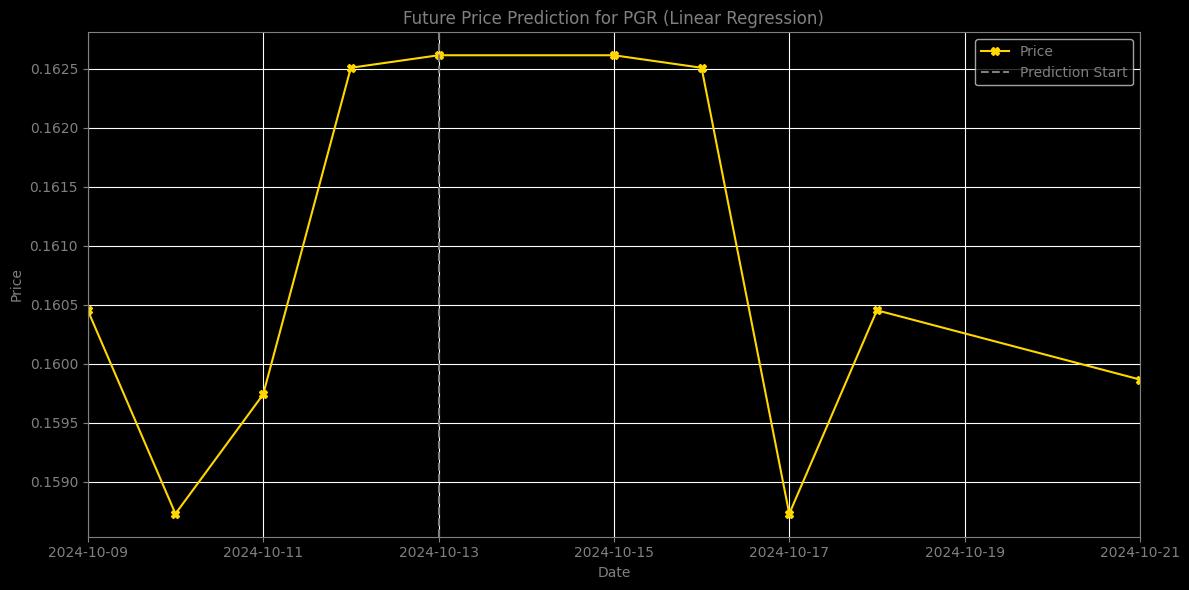

In [30]:
# Plotting

plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data, label='Price', color='gold', marker='X')
plt.axvline(x=df.index[-1], color='grey', linestyle='--', label='Prediction Start')

plt.title('Future Price Prediction for PGR (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim(combined_data.index[-10], combined_data.index[-1])  # Set x-axis days
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

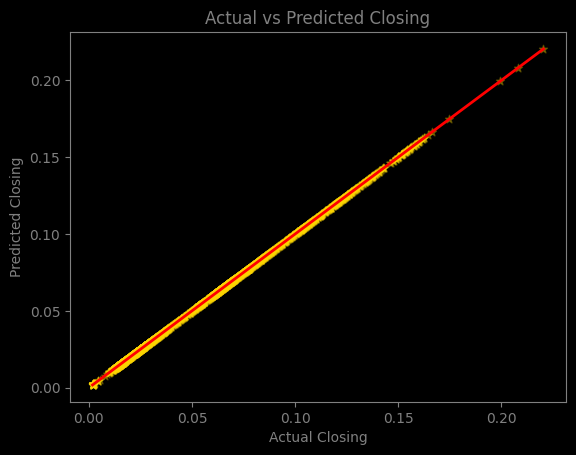

In [31]:
#Predict the values
y_pred = model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='GOLD', alpha=0.3, marker='*')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Closing')
plt.ylabel('Predicted Closing')
plt.title('Actual vs Predicted Closing')
plt.show()

## MODEL-01 LSTM with RandomForest Regression Model for Price prediction

In [32]:
# Download data
# end = datetime.now()
end = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")  # End date for the data (excluding the last 5 days)
ticker = "BTC-USD"
start = "2020-01-01"  # Start date for the data (10 years ago from today)

df = yf.download(ticker, start=start, end=end)

# Preprocess the data
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(lambda date: date.timestamp())
df = df.sort_index()

# Remove noise and outliers
z_scores = zscore(df)
df = df[(z_scores > -3) & (z_scores < 3)]

# Feature engineering
df['Price_Change_Pct'] = df['Close'].pct_change()
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['50d_MA'] = df['Close'].rolling(window=50).mean()
df['200d_MA'] = df['Close'].rolling(window=200).mean()

# Technical indicators
rsi_indicator = RSIIndicator(df['Close'], window=14)
df['RSI'] = rsi_indicator.rsi()

bb_indicator = BollingerBands(df['Close'], window=20, window_dev=2)
df['Bollinger_Bands'] = bb_indicator.bollinger_mavg()

macd_indicator = MACD(df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()
df['MACD_Hist'] = macd_indicator.macd_diff()

# Remove NA
df = df.dropna()
df = df.replace('', np.nan).dropna()
df = df[~df.isnull().any(axis=1)]

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = train_df.sort_index()
test_df = test_df.sort_index()

# Train an LSTM model with regularization
train_X = np.reshape(train_df[['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD']].values, (train_df.shape[0], 1, 8))
train_y = train_df['Close'].values
test_X = np.reshape(test_df[['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD']].values, (test_df.shape[0], 1, 8))
test_y = test_df['Close'].values

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, 8), kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

early_stopping = EarlyStopping(patience=10, monitor='val_loss', verbose=1)
lstm_model.fit(train_X, train_y, epochs=100, batch_size=42, validation_data=(test_X, test_y), callbacks=[early_stopping])

# Perform MultiOutputRegressor for Random Forest
y_multi = np.stack([train_df['Close'], train_df['Close']], axis=1)
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(train_df[['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD']], y_multi)

def hybrid_predict(data):
    # Weighted average
    weights = [0.3, 0.99]  # adjust these weights to control the balance between LSTM and RF

    if data.shape[0] == 1:  # If only one row of data
        data = data.values.reshape(1, 1, 8)
        lstm_pred = lstm_model.predict(data)
        rf_pred = rf_model.predict(data.reshape((data.shape[0], -1)))
        combined_pred = (weights[0] * lstm_pred[0, 0]) + (weights[1] * rf_pred[0, 0])
        return np.array([combined_pred])
    else:
        data = data[['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD']]
        n_steps = 1
        n_features = data.shape[1]
        data = np.reshape(data.values, (data.shape[0], n_steps, n_features))
        lstm_pred = lstm_model.predict(data)
        rf_pred = rf_model.predict(data.reshape((data.shape[0], -1)))
        lstm_mean = np.mean(lstm_pred, axis=1)
        rf_mean = np.mean(rf_pred, axis=1)
        combined_pred = (weights[0] * lstm_mean) + (weights[1] * rf_mean)
        return combined_pred

# Evaluate model performance
test_pred = hybrid_predict(test_df)
mae = np.mean(np.abs(test_pred - test_df['Close'].values[:test_pred.shape[0]]))
mse = np.mean((test_pred - test_df['Close'].values[:test_pred.shape[0]]) ** 2)
print('Hybrid Model MAE:', mae)
print('Hybrid Model MSE:', mse)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1685218048.0000 - val_loss: 1676290688.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1636060160.0000 - val_loss: 1676262912.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1666859136.0000 - val_loss: 1676221952.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1649588608.0000 - val_loss: 1676157952.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1658370688.0000 - val_loss: 1675985920.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1705400832.0000 - val_loss: 1675903360.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1644287616.0000 - val_loss: 1675781632.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1630678528.0000 - val_loss: 1675651584.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1721275776.0000 - val_loss: 1675465344.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1634770816.0

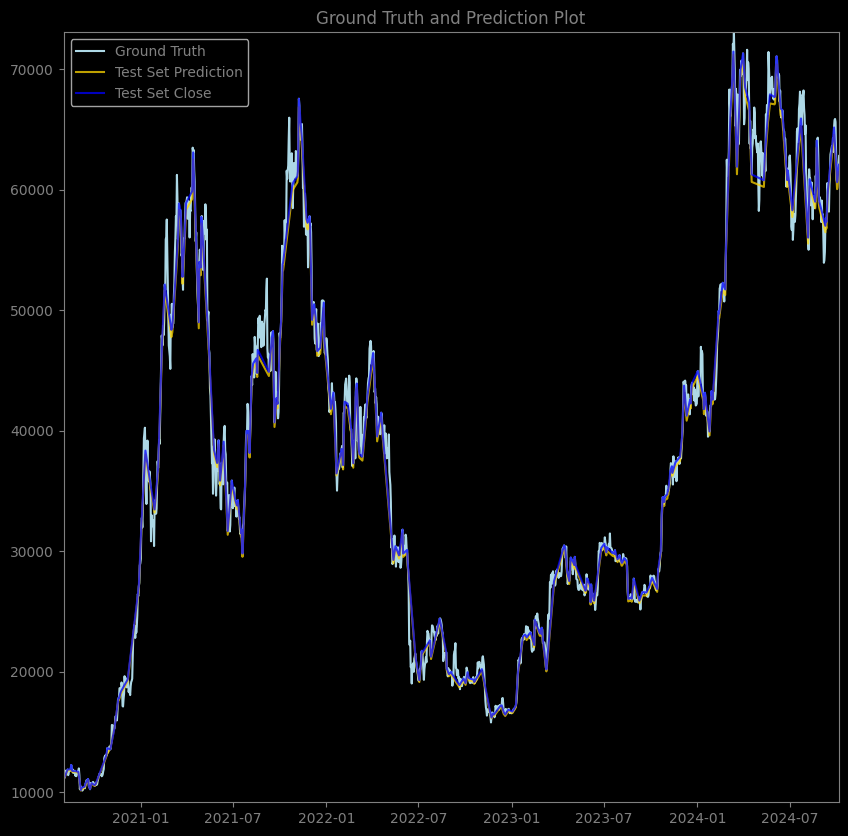

In [33]:
# Sort the test_df.index values
test_df = test_df.sort_index()

# Plot the ground truth
plt.figure(figsize=(10,10))
plt.plot(df.index, df['Close'], label='Ground Truth', alpha=1, color='LIGHTBLUE')

# Plot the prediction only for the test set
plt.plot(test_df.index[:test_pred.shape[0]], test_pred, label='Test Set Prediction', color='GOLD', alpha=0.75)

# Plot the 'Close' price in the test set
plt.plot(test_df.index[:test_pred.shape[0]], test_df['Close'][:test_pred.shape[0]], label='Test Set Close', color='BLUE', alpha=0.75)

# Set the x-axis limits to match the range of the data
plt.xlim([test_df.index[0], test_df.index[-1]])

# Set the y-axis limits to match the range of the data
plt.ylim([df['Close'].min(), df['Close'].max()])

# Set the title and legend
plt.title('Ground Truth and Prediction Plot')
plt.legend()

# Show the plot
plt.show()

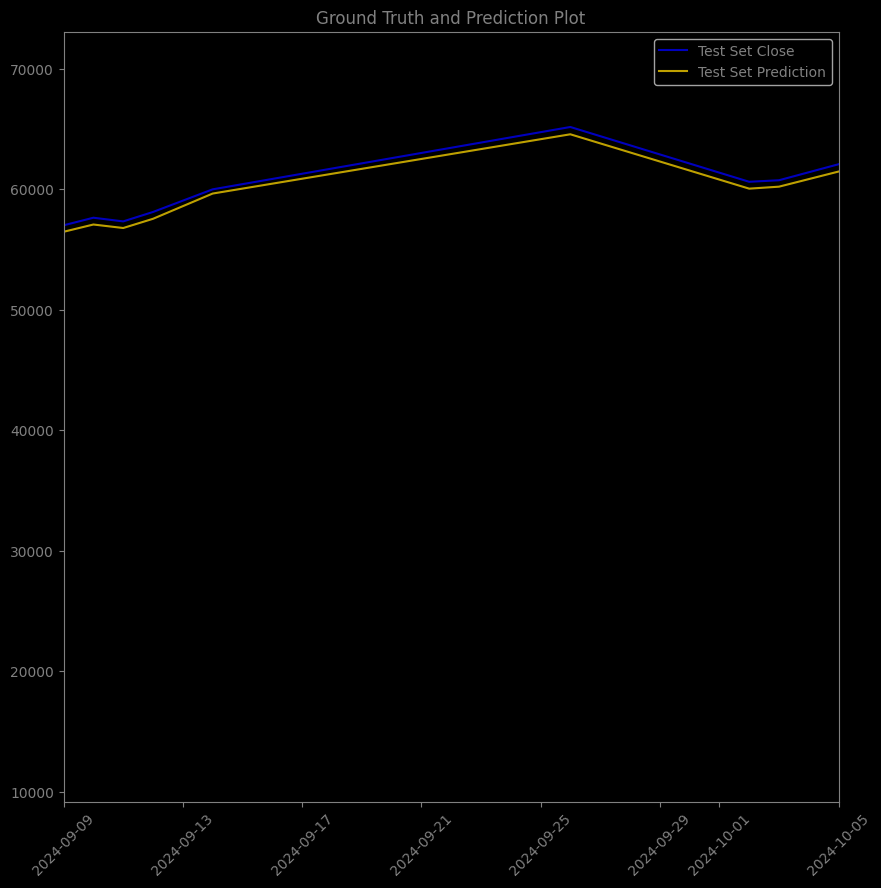

In [34]:
# Filter the test_df dataframe to only include the last 30 days
test_df_filtered = test_df[test_df.index > (test_df.index.max() - pd.Timedelta(days=30))]

# Plot the data using the filtered dataframe
plt.figure(figsize=(10,10))
plt.plot(test_df_filtered.index, test_df_filtered['Close'], label='Test Set Close', color='BLUE', alpha=0.75)
plt.plot(test_df_filtered.index, test_pred[-len(test_df_filtered):], label='Test Set Prediction', color='GOLD', alpha=0.75)
plt.xlim(test_df_filtered.index.min(), test_df_filtered.index.max())
plt.ylim([df['Close'].min(), df['Close'].max()])
plt.xticks(rotation=45)
plt.title('Ground Truth and Prediction Plot')
plt.legend()
plt.show()

In [35]:
# Predict the next 5 closing prices and all other features
last_row = df[['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD']].iloc[-1].values

# DataFrame to hold the predictions
future_predictions = []

# Predict next 5 days
for _ in range(5):
    # Predict next close
    next_close = hybrid_predict(pd.DataFrame([last_row], columns=['Close', 'Price_Change_Pct', 'Log_Returns', '50d_MA', '200d_MA', 'RSI', 'Bollinger_Bands', 'MACD'])).flatten()[0]

    # Calculate other values based on the predicted close value
    next_price_change_pct = (next_close - last_row[0]) / last_row[0]
    next_log_returns = np.log(next_close / last_row[0])

    # Use an exponential moving average to calculate the next 50d MA and 200d MA
    next_50d_ma = np.mean(df['Close'].iloc[-50:]) * 0.9 + next_close * 0.1
    next_200d_ma = np.mean(df['Close'].iloc[-200:]) * 0.9 + next_close * 0.1

    # Use the previous values for RSI, Bollinger Bands, and MACD
    next_rsi = last_row[5]
    next_bollinger_bands = last_row[6]
    next_macd = last_row[7]

    # Create a list of 8 values
    next_row = [next_close, next_price_change_pct, next_log_returns, next_50d_ma, next_200d_ma, next_rsi, next_bollinger_bands, next_macd]

    # Append the predicted row
    future_predictions.append(next_row)

    # Update last row
    last_row = next_row

# DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Business
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close', 'Predicted Price Change Pct', 'Predicted Log Returns', 'Predicted 50d MA', 'Predicted 200d MA', 'Predicted RSI', 'Predicted Bollinger Bands', 'Predicted MACD'])

print(future_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
            Predicted Close  Predicted Price Change Pct  \
2024-10-14     62267.930795                   -0.009283   
2024-10-15     61637.195724                   -0.010129   
2024-10-16     61029.094527                   -0.009866   
2024-10-17     60390.057764                   -0.010471   
2024-10-18     59762.561926                   -0.010391   

            Predicted Log Returns  Predicted 50d MA  Predicted 200d MA  \
2024-10-14              -0.009326      60890.980212       63340.638040   
2024-10-15              -0.010181      60827.906705       63277.564533   
2024-10-16              -0.009915      60767.096586       63216.754414   
2024-10-17              -0.010526      60703.192909       63152.850737   
2024-10-18              -0.010445      60640.443325       63090.101154   

          

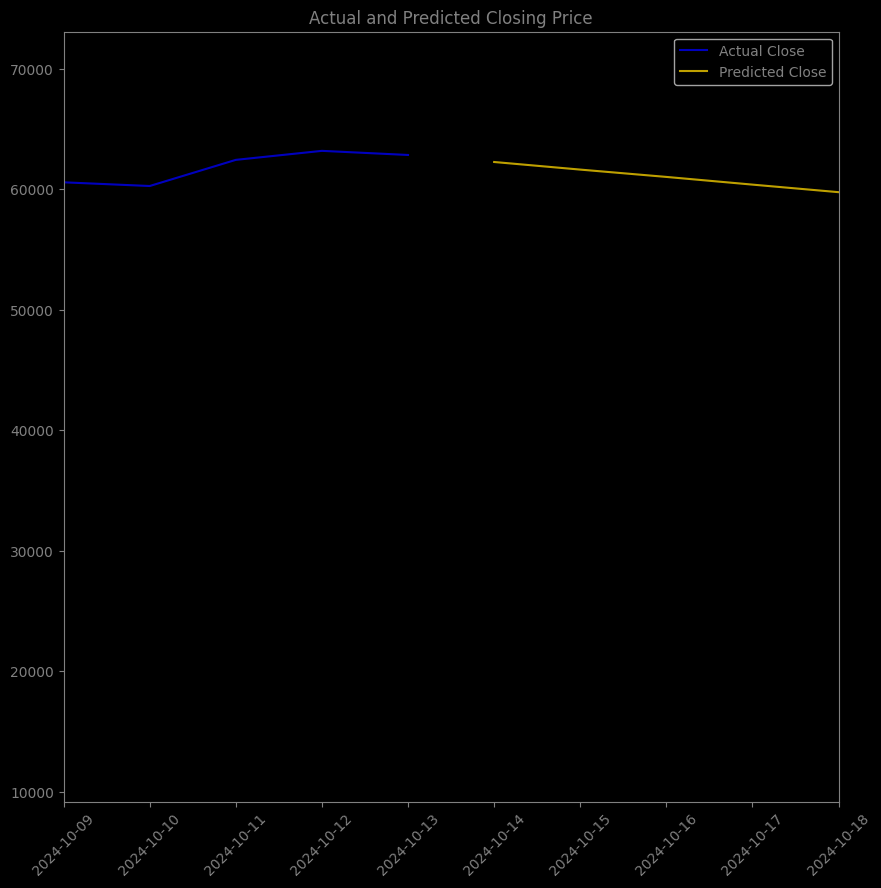

In [36]:
# Plot the closing price of the last five days with the future five days
plt.figure(figsize=(10,10))
plt.plot(df.index[-5:], df['Close'][-5:], label='Actual Close', color='BLUE', alpha=0.75)
plt.plot(future_df.index, future_df['Predicted Close'], label='Predicted Close', color='GOLD', alpha=0.75)
plt.xlim(df.index[-5], future_df.index[-1])
plt.ylim([df['Close'].min(), df['Close'].max()])
plt.xticks(rotation=45)
plt.title('Actual and Predicted Closing Price')
plt.legend()
plt.show()

In [37]:
print(train_df.head())
print(train_df.tail())
print(test_df.head())
print(test_df.tail())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-07-18  9151.183594  9230.983398  9100.824219  9159.040039  9159.040039   
2020-07-19  9158.005859  9201.398438  9097.632812  9185.817383  9185.817383   
2020-07-20  9187.220703  9214.270508  9137.509766  9164.231445  9164.231445   
2020-07-21  9162.514648  9407.262695  9149.389648  9374.887695  9374.887695   
2020-07-22  9375.080078  9530.518555  9319.653320  9525.363281  9525.363281   

                  Volume          Date  Price_Change_Pct  Log_Returns  \
Date                                                                    
2020-07-18  1.225260e+10  1.595030e+09          0.000836     0.000835   
2020-07-19  1.293900e+10  1.595117e+09          0.002924     0.002919   
2020-07-20  1.375560e+10  1.595203e+09         -0.002350    -0.002353   
2020-07-21  1.806958e+10  1.595290e+09          0.022987     0.022727   
2020-07-

## MODEL-02 LSTM with RandomForest Regression Model for Price prediction

In [41]:
from sklearn.impute import SimpleImputer
# Define ticker symbol and data range
ticker = "BTC-USD"
start = "2000-01-01"
end = yf.Ticker(ticker).history(period="5d").index[0].strftime("%Y-%m-%d")

# Download historical data
df = yf.download(ticker, start=start, end=end)

# Feature engineering (consider adding more features relevant to your needs)
def create_features(df):
    df['Change'] = df['Close'] - df['Open']
    df['Pct_Change'] = df['Change'] / df['Open'] * 100
    df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
    df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()
    df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()
    df['Exp_Moving_Avg'] = df['Close'].ewm(span=10, adjust=False).mean()
    return df

df = create_features(df.copy())  # Avoid modifying the original dataframe

# Split data into features (X) and target (y)
X = df.drop(['Close'], axis=1)  # Drop Close price as target
y = df['Close']

# Remove rows with NaN values from X and y together
df_xy = pd.concat([X, y], axis=1)
df_xy = df_xy.dropna()

# Split data into features (X) and target (y) again
X = df_xy.drop(['Close'], axis=1)
y = df_xy['Close']

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# 1. Train LSTM model for feature extraction
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(X_train, np.reshape(y_train.values, (-1, 1)), epochs=50, batch_size=32, validation_data=(X_test, np.reshape(y_test.values, (-1, 1))))

# 2. Extract features from LSTM
lstm_features_train = lstm_model.predict(X_train)
lstm_features_test = lstm_model.predict(X_test)

# 3. Train Random Forest model on extracted features and target
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(lstm_features_train, y_train)

# 4. Make predictions using the Random Forest model
predictions = rf_model.predict(lstm_features_test)

# Evaluate model performance using metrics like mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

[*********************100%***********************]  1 of 1 completed


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 731088832.0000 - val_loss: 746195136.0000
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 745501888.0000 - val_loss: 746015168.0000
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 764478528.0000 - val_loss: 745851648.0000
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 714644800.0000 - val_loss: 745695744.0000
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 716546688.0000 - val_loss: 745540736.0000
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 705057600.0000 - val_loss: 745387840.0000
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 728537856.0000 - val_loss: 745238016.0000
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 726980032.0000 - val_loss: 745086976.0000
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 701225344.0000 - val_loss: 744937600.0000
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 691344320.0000 - val_loss: 7447